In [57]:
from math import sqrt, ceil
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [58]:
plt.style.use("dark_background")

In [59]:
data = pd.read_csv('../data/student-por.csv')

In [60]:
Y = data[['G1', 'G2', 'G3']].sum(axis=1)
X = data.drop(['G1', 'G2', 'G3'], axis=1)
X = (X-X.min())/(X.max()-X.min())
Y = Y.apply(lambda x: 1 if x > 36 else 0)

In [61]:
print(Y.value_counts())

0    373
1    276
Name: count, dtype: int64


In [62]:
def knn_thing(L_sk, Y, log_data, ratio=.2, rs=42):
    curr_best_report = None
    curr_best_k = None
    best_f1 = 0
    for i in range(1, ceil(sqrt(len(X)))):
        X_train, X_test, y_train, y_test = train_test_split(L_sk, Y, test_size=ratio, random_state=rs)
    
        knn = KNeighborsClassifier(n_neighbors=i)

        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        if f1 > best_f1:
            best_f1 = f1
            curr_best_report = classification_report(y_test, y_pred)
            curr_best_k = i
        log_data.append({'k': i, 'F1 Score': f1, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})

    log_df = pd.DataFrame(log_data)
    
    log_df.to_csv(f'../reports/knn_{ratio}.csv', index=False)
    print(f"Best K: {curr_best_k}")
    print(curr_best_report)

In [63]:
def plot_log(log_df, title='Performance Metrics vs. k(With PCA)'):
    plt.figure(figsize=(10, 6))
    plt.plot(log_df['k'], log_df['F1 Score'], label='F1 Score')
    plt.plot(log_df['k'], log_df['Accuracy'], label='Accuracy')
    plt.plot(log_df['k'], log_df['Precision'], label='Precision')
    plt.plot(log_df['k'], log_df['Recall'], label='Recall')

    plt.xlabel('k')
    plt.ylabel('value')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.ylim(0.35, 0.8)
    ratio = title.split(' ')[-1]
    ratio = ratio[0:1] + '_' + ratio[2:]
    filename = '../plots/knn_' + ratio.split(':')[0] + '.png'
    plt.savefig(filename)
    plt.show()

Best K: 15
              precision    recall  f1-score   support

           0       0.73      0.53      0.61        70
           1       0.58      0.77      0.66        60

    accuracy                           0.64       130
   macro avg       0.65      0.65      0.64       130
weighted avg       0.66      0.64      0.63       130


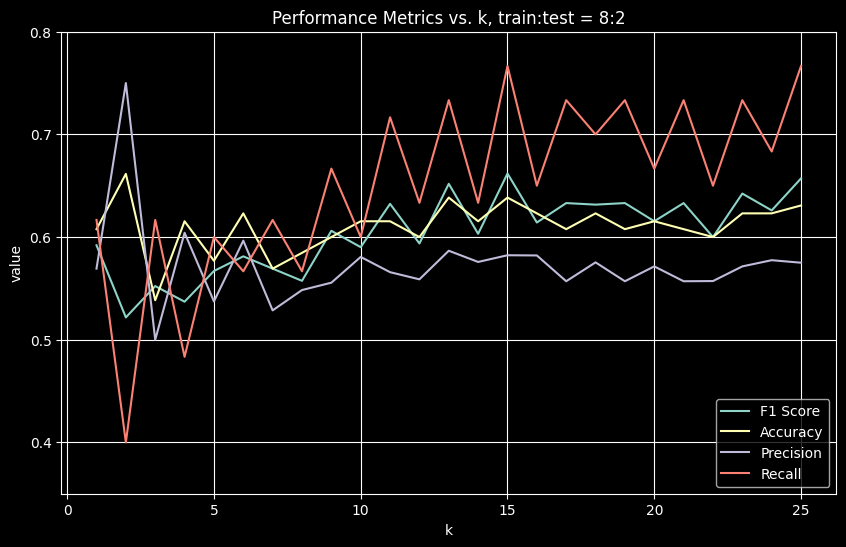

CPU times: total: 312 ms
Wall time: 506 ms


In [64]:
%%time
## KNN with train:test = 8:2
log_data = []
knn_thing(X, Y, log_data)
plot_log(pd.DataFrame(log_data), title='Performance Metrics vs. k, train:test = 8:2')

Best K: 19
              precision    recall  f1-score   support

           0       0.76      0.54      0.63       110
           1       0.56      0.78      0.65        85

    accuracy                           0.64       195
   macro avg       0.66      0.66      0.64       195
weighted avg       0.67      0.64      0.64       195


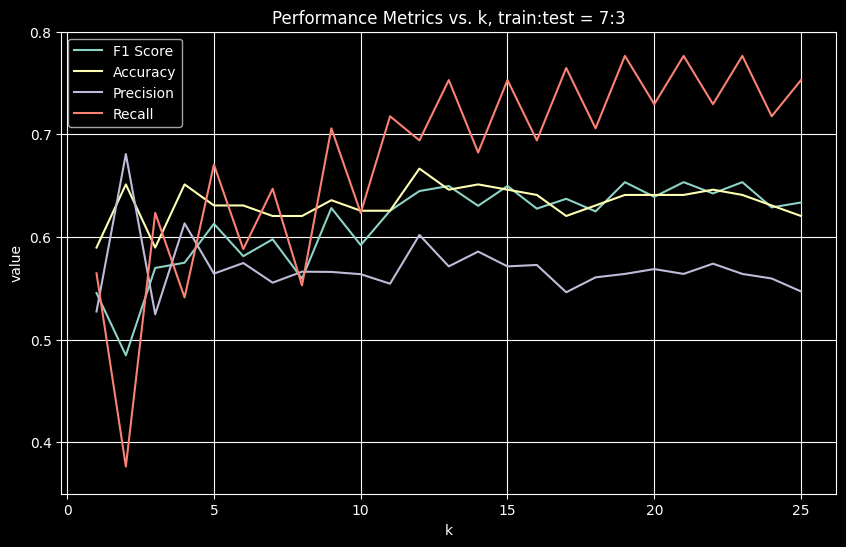

CPU times: total: 234 ms
Wall time: 579 ms


In [65]:
%%time
## KNN with train:test = 7:3
log_data = []
knn_thing(X, Y, log_data, ratio=.3)
plot_log(pd.DataFrame(log_data), title='Performance Metrics vs. k, train:test = 7:3')